<a href="https://colab.research.google.com/github/nhthinh989/Python-RFM-Analysis/blob/main/RFM_Analysis_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import squarify as sq

In [ ]:
ecommerce = pd.read_csv('ecommerce.csv')
segment = pd.read_csv('segmentation.csv')

In [ ]:
ecommerce

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,"0,85",12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,"2,1",12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,"4,15",12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,"4,15",12680.0,France


In [ ]:
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


# **Part I: EDA**




In [ ]:
print("EDA for ecommerce")
print(ecommerce.isnull().sum())
print("\nDuplicates:", ecommerce.duplicated().sum())
print("\nData types:")
print(ecommerce.dtypes)
print("\nNumerical Summary:")
print(ecommerce.describe())

EDA for ecommerce
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicates: 5268

Data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice       object
CustomerID     float64
Country         object
dtype: object

Numerical Summary:
            Quantity     CustomerID
count  541909.000000  406829.000000
mean        9.552250   15287.690570
std       218.081158    1713.600303
min    -80995.000000   12346.000000
25%         1.000000   13953.000000
50%         3.000000   15152.000000
75%        10.000000   16791.000000
max     80995.000000   18287.000000


In [ ]:
# Check detail missing values

ecommerce[ecommerce.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,"2,51",NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,"2,51",NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,"0,85",NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,"1,66",NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,"4,13",NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,"4,13",NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,"4,96",NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,"10,79",NaN,United Kingdom


In [ ]:
ecommerce.dropna(subset='CustomerID',inplace=True)
ecommerce.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Check duplicated

ecommerce.nunique()

,0
InvoiceNo,22190
StockCode,3684
Description,3896
Quantity,436
InvoiceDate,20460
UnitPrice,620
CustomerID,4372
Country,37


In [ ]:
ecommerce[ecommerce.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,"1,25",17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,"2,1",17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,"2,95",17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,"4,95",17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,"2,95",17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,"0,39",14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,"2,49",14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,"1,95",14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,"2,1",14446.0,United Kingdom


In [ ]:
ecommerce.shape

(406829, 8)

Không có cột nào là unique

In [ ]:
# Check detail Data types
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [ ]:
ecommerce['InvoiceDate'] = pd.to_datetime(ecommerce['InvoiceDate'], format="%m/%d/%y %H:%M")

ecommerce['UnitPrice'] = ecommerce['UnitPrice'].astype(str)
ecommerce['UnitPrice'] = ecommerce['UnitPrice'].str.replace(',', '.')
ecommerce['UnitPrice'] = pd.to_numeric(ecommerce['UnitPrice'])

In [ ]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Data Values

ecommerce.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
ecommerce[ecommerce['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
rows_to_drop = ecommerce[(ecommerce['UnitPrice'] <= 0) | (ecommerce['Quantity'] <= 0)].index
ecommerce.drop(rows_to_drop, inplace = True)

In [ ]:
ecommerce.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


**EDA handling:**
- **Missing values**:
 - 1454 rows in Description -> No info to fill in -> No action
 - 135080 rows in CustomerID -> depends on the RFM calculation -> Remove
- **Duplicates:** All columns have duplicates -> Table have no Primary Keys (Because 1 invoice having many purchased items, each line represents 1 item) -> No action
- **Data Type:**
 - InvoiceDate object -> datetime
 - UnitPrice: object with decimal values using commas -> float with decimal values using dots.
- **Data Values:**
 - Quantity < 0 -> Cancelled invoices -> Remove
 - UnitPrice < 0 -> Assumption:Error -> Remove



# **Part II: Data Wrangling**

## **RFM Calculation**

In [ ]:
# Recency

# Find last purchase date of each customer
calculation = ecommerce.groupby("CustomerID").agg({"InvoiceDate":"max"})

# Calculate number of days from last purchase
calculation["CurrentDate"] = datetime(2011, 12, 31)
calculation["Recency"] = (calculation["InvoiceDate"] - calculation["CurrentDate"]).dt.days
calculation.head()

,InvoiceDate,CurrentDate,Recency
CustomerID,,,
12346.0,2011-01-18 10:01:00,2011-12-31,-347
12347.0,2011-12-07 15:52:00,2011-12-31,-24
12348.0,2011-09-25 13:13:00,2011-12-31,-97
12349.0,2011-11-21 09:51:00,2011-12-31,-40
12350.0,2011-02-02 16:01:00,2011-12-31,-332


In [ ]:
# Frequency

# Find total purchase invoices per customer
calculation["Frequency"] = ecommerce.groupby("CustomerID")["InvoiceNo"].nunique()
calculation.head()

,InvoiceDate,CurrentDate,Recency,Frequency
CustomerID,,,,
12346.0,2011-01-18 10:01:00,2011-12-31,-347,1
12347.0,2011-12-07 15:52:00,2011-12-31,-24,7
12348.0,2011-09-25 13:13:00,2011-12-31,-97,4
12349.0,2011-11-21 09:51:00,2011-12-31,-40,1
12350.0,2011-02-02 16:01:00,2011-12-31,-332,1


In [ ]:
# Monetory

# Calculate line total of each item in each invoice
ecommerce["LineTotal"] = ecommerce["Quantity"]*ecommerce["UnitPrice"]

# Calculate total purchase value per customer
calculation["Monetary"] = ecommerce.groupby("CustomerID")["LineTotal"].sum()
calculation.head()

,InvoiceDate,CurrentDate,Recency,Frequency,Monetary
CustomerID,,,,,
12346.0,2011-01-18 10:01:00,2011-12-31,-347,1,77183.60
12347.0,2011-12-07 15:52:00,2011-12-31,-24,7,4310.00
12348.0,2011-09-25 13:13:00,2011-12-31,-97,4,1797.24
12349.0,2011-11-21 09:51:00,2011-12-31,-40,1,1757.55
12350.0,2011-02-02 16:01:00,2011-12-31,-332,1,334.40


## **Ranking**

In [ ]:
# Rank order of data to define cut point
orderFrequency = calculation["Frequency"].rank(method='first')

# Scoring R-F-M
calculation["F_score"] = pd.qcut(orderFrequency, 5, labels=["1", "2", "3", "4", "5"])
calculation[["R_score", "M_score"]] = calculation[["Recency", "Monetary"]].apply(lambda x: pd.qcut(x, 5, labels=["1", "2", "3", "4", "5"]))

# Concat R-F-M score
calculation["RFM_score"] = calculation.apply(lambda x:'%s%s%s' % (x["R_score"],x["F_score"],x["M_score"]),axis=1)
calculation["RFM_score"] = calculation["RFM_score"].astype(int)

calculation.reset_index(inplace=True)

calculation.head()

,CustomerID,InvoiceDate,CurrentDate,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_score
0,12346.0,2011-01-18 10:01:00,2011-12-31,-347,1,77183.60,1,1,5,115
1,12347.0,2011-12-07 15:52:00,2011-12-31,-24,7,4310.00,5,5,5,555
2,12348.0,2011-09-25 13:13:00,2011-12-31,-97,4,1797.24,4,2,4,244
3,12349.0,2011-11-21 09:51:00,2011-12-31,-40,1,1757.55,1,4,4,414
4,12350.0,2011-02-02 16:01:00,2011-12-31,-332,1,334.40,1,1,2,112


## **Segnentation**

In [ ]:
# Convert comma-separated string to a list of RFM scores
segment["RFM Score"] = segment["RFM Score"].astype(str)
segment["RFM Score"] = segment["RFM Score"].str.split(",")

In [ ]:
# Transform each element of a list-like to a row
segment = segment.explode("RFM Score").reset_index(drop=True)
segment["RFM Score"] = segment["RFM Score"].astype(int)


# Merge segmentation with calculation df to show Segment name
rfm = calculation.merge(segment, how="left", left_on="RFM_score", right_on="RFM Score")
rfm.head()

,CustomerID,InvoiceDate,CurrentDate,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_score,Segment,RFM Score
0,12346.0,2011-01-18 10:01:00,2011-12-31,-347,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,12347.0,2011-12-07 15:52:00,2011-12-31,-24,7,4310.00,5,5,5,555,Champions,555
2,12348.0,2011-09-25 13:13:00,2011-12-31,-97,4,1797.24,4,2,4,244,At Risk,244
3,12349.0,2011-11-21 09:51:00,2011-12-31,-40,1,1757.55,1,4,4,414,Promising,414
4,12350.0,2011-02-02 16:01:00,2011-12-31,-332,1,334.40,1,1,2,112,Lost customers,112


## **Visualization**

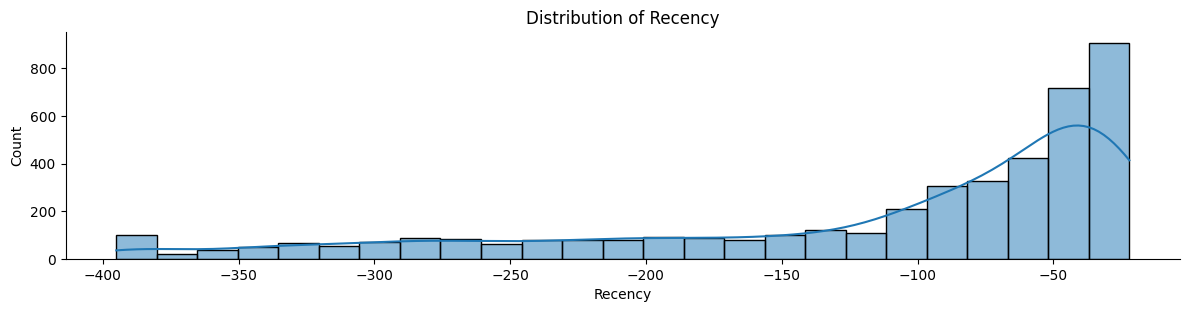

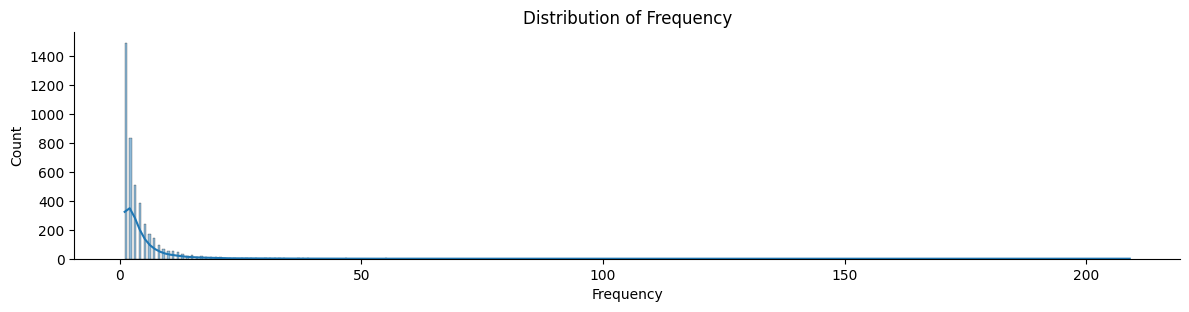

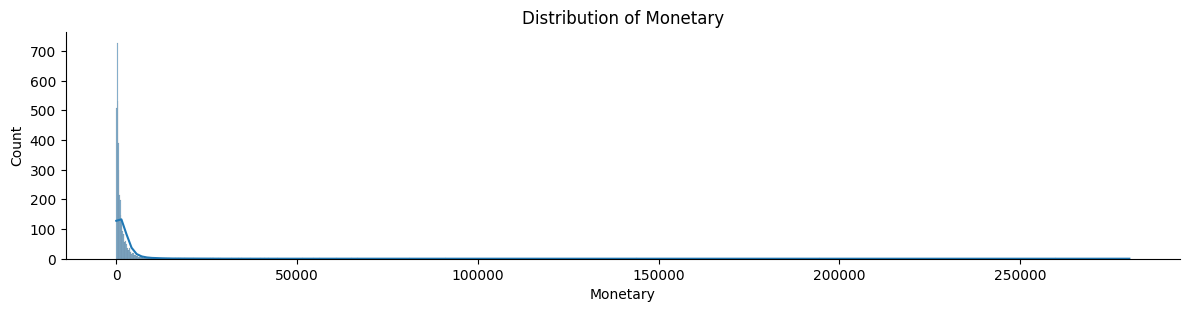

In [ ]:
# Distribution of R,F,M
colnames = ["Recency", "Frequency", "Monetary"]

for col in colnames:
    sns.displot(rfm[col], kde=True, height=3, aspect=4)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Count number of customers per Segment
grp = rfm.groupby('Segment').agg({'CustomerID':'count'})
grp = grp.reset_index()
grp["Percent"] = grp["CustomerID"]/ (grp["CustomerID"].sum())
grp.head()

,Segment,CustomerID,Percent
0,About To Sleep,283,0.065237
1,At Risk,436,0.100507
2,Cannot Lose Them,92,0.021208
3,Champions,826,0.190410
4,Hibernating customers,708,0.163209


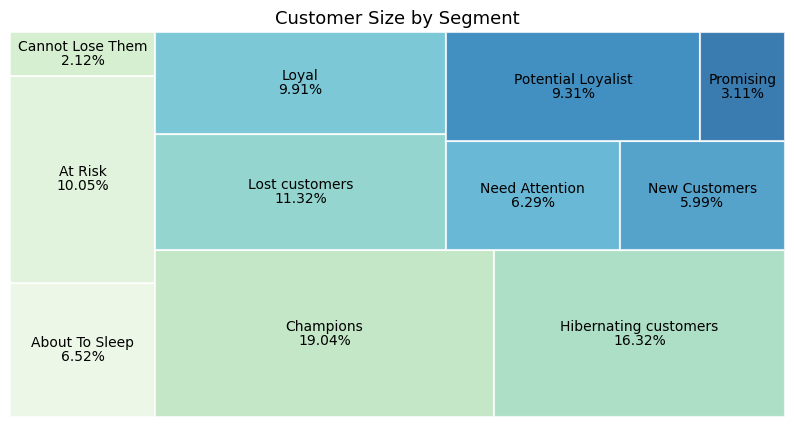

In [ ]:
# Define colors
colors = sns.color_palette('GnBu',11)

# Draw treemap
fig,ax = plt.subplots(1, figsize=(10,5))
sq.plot(sizes=grp["CustomerID"],
              label=grp["Segment"],
              value=[f'{x*100:.2f}%' for x in grp["Percent"]],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title("Customer Size by Segment", fontsize=13)
plt.axis("off")
plt.show()

In [ ]:
# Calculate Total Sales per Segment
grpM = rfm.groupby("Segment").agg({"Monetary":"sum"})
grpM = grpM.reset_index()
grpM["Percent"] = grpM["Monetary"]/ (grpM["Monetary"].sum())
grpM.head()

,Segment,Monetary,Percent
0,About To Sleep,78461.520,0.008805
1,At Risk,770544.831,0.086467
2,Cannot Lose Them,205324.720,0.023041
3,Champions,5571607.490,0.625222
4,Hibernating customers,291353.562,0.032694


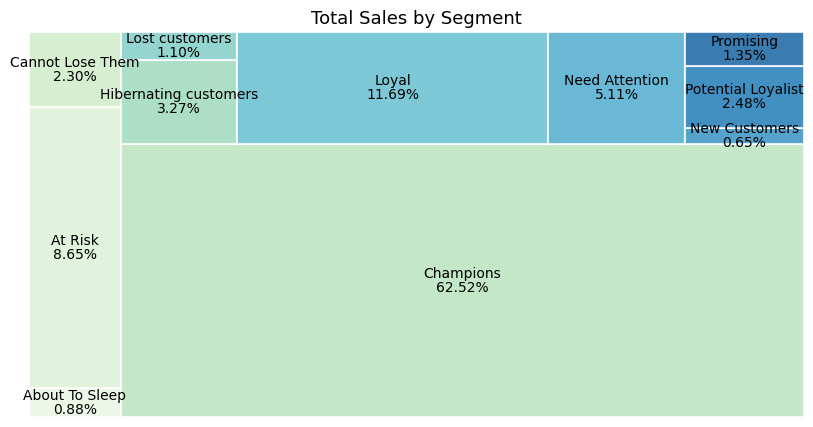

In [ ]:
fig,ax = plt.subplots(1, figsize=(10,5))
sq.plot(sizes=grpM["Monetary"],
              label=grpM["Segment"],
              value=[f'{x*100:.2f}%' for x in grpM["Percent"]],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title("Total Sales by Segment", fontsize=13)
plt.axis("off")
plt.show()

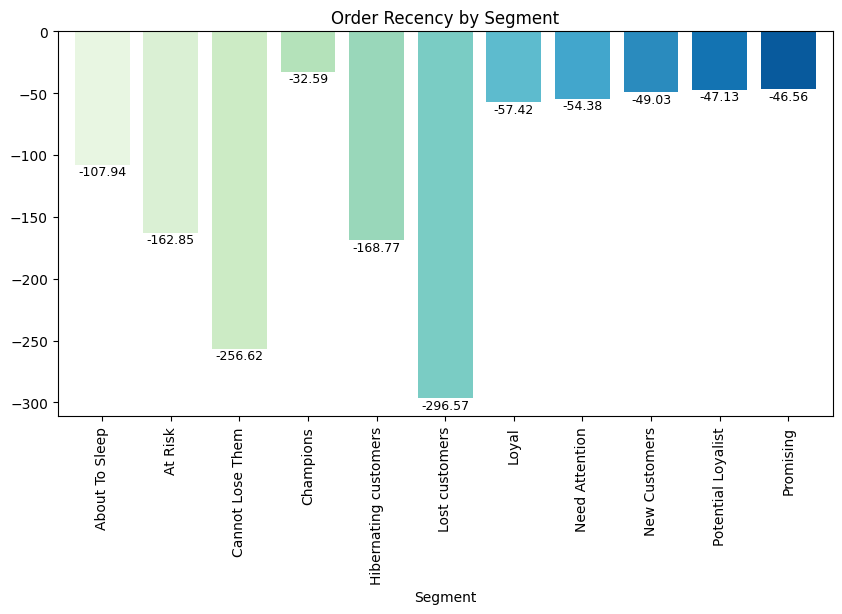

In [ ]:
# Order Recency by Segment
ax = rfm.groupby('Segment').Recency.mean().plot.bar(figsize=(10, 5), color=colors, width=0.8)
plt.title('Order Recency by Segment')

for p in ax.patches:
    height = p.get_height()
    # Place the label below the bar
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height-11),
                ha='center', va='bottom', fontsize=9)

plt.show()

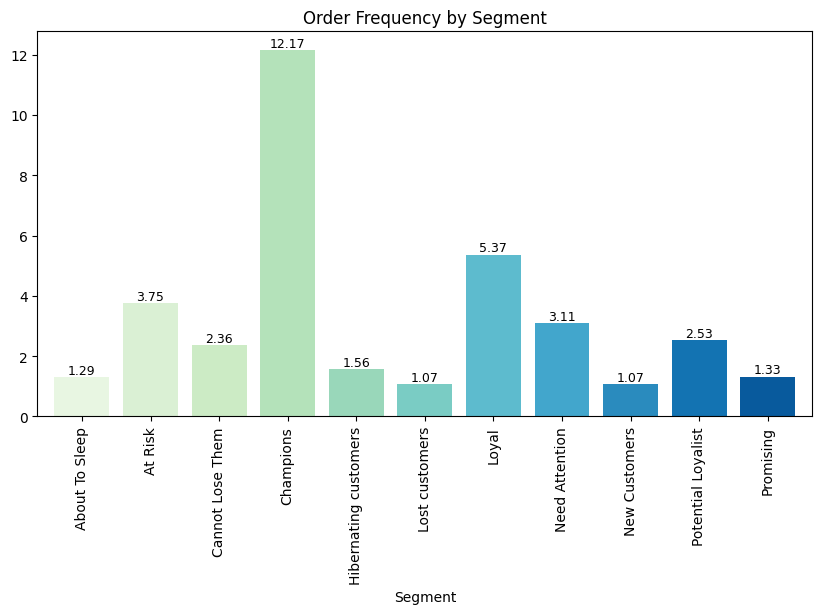

In [ ]:
ax = rfm.groupby('Segment').Frequency.mean().plot.bar(figsize=(10, 5), color=colors, width=0.8)
plt.title('Order Frequency by Segment')

for p in ax.patches:
    height = p.get_height()
    # Place the label above the bar
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.show()

# **Part III: Insight**

### **Characteristics of the 11 Customer Segments:**

- **Champions:** The **best customers**—they shop frequently, spend a lot, and have **high engagement**. They are the **most valuable group** and should be retained.
- **Loyal:** **Repeat customers** who regularly return and provide high value to the business.
- **Potential Loyalists:** Customers with the potential to become **loyal**—they have made recent purchases and show **stable spending behavior**.
- **Promising:** **New customers** who have just started shopping and **show growth potential**.
- **New Customers:** Customers who have **just made their first transaction**. The focus should be on **building relationships** to develop long-term value.
- **Cannot Lose Them:** **Important customers** who used to spend significantly but have **recently become inactive**. Immediate action is needed to **retain them**.
- **At Risk:** Customers who **used to shop frequently** but have **reduced interactions** recently. They need **re-engagement campaigns** to bring them back.
- **Need Attention:** Customers who **are not highly active** but still hold **some value**. They need **additional motivation** to return.
- **About to Sleep:** Customers with **low engagement** and **few recent transactions**. With the right activation strategies, they could be **converted into loyal customers**.
- **Hibernating Customers:** Customers who have **made purchases in the past** but have **not been active recently**.
- **Lost Customers:** Customers who **have not interacted** for a **long time**. **Reactivating them will be difficult** and they have **low potential**.

### **Segments at Superstore**

1. Approximately **19% of customers** belong to the **Champion** segment—representing the **best customers**. Two other **high-potential** segments, **Loyal** and **Potential Loyalist**, together account for nearly **20%** of the customer base. **Champions and Loyal customers** also contribute the **highest revenue**, with **Champions generating around 62% of total revenue**.

➡ **Strategy:** Offer **exclusive perks, loyalty programs, or premium (VIP) services** to enhance engagement and retention.

2. More than **one-third of the customers** are at risk of **not returning**, belonging to the **Hibernating Customers, Lost Customers, and About to Sleep** segments. Notably, **Hibernating Customers** make up the **second-largest** customer group at **16.32%**.

➡ **Strategy:** **Identify the reasons** why these customers are not returning and **address** the underlying issues.

3. Approximately **18% of customers** fall into the **Need Attention, At Risk, and Cannot Lose Them** categories, meaning they are also at risk of **churning** and need **re-engagement efforts**.

➡ **Strategy:** **Provide attractive incentives** such as **discounts, free gifts, or special promotions** to encourage their return.

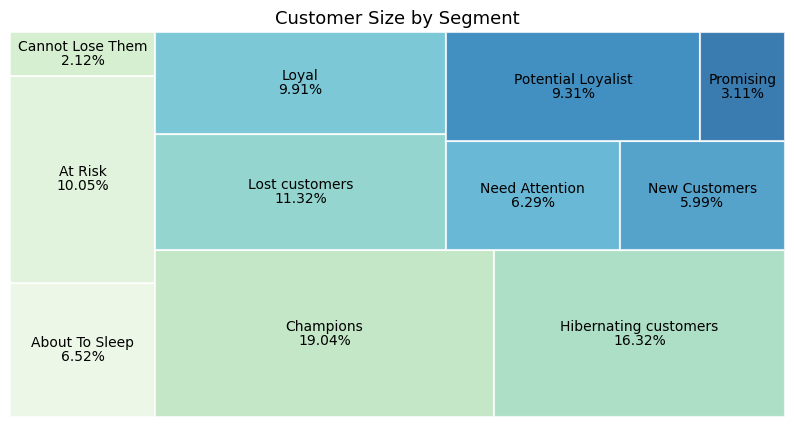

### **3. Proposed Solutions for High-Value Customer Segments (Champion, Loyal, and Potential Loyalist)**



**1. Champion**
- Enhance customer service through loyalty programs, including special promotions and exclusive offers to show appreciation while allowing customers to accumulate reward points.
- Focus on efficient customer support, ensuring quick handling of returns, exchanges, and warranties.
- Increase revenue by recommending higher-value products or product bundles based on the following criteria:
 1. Itemlist1: A list of products priced above the average price of items previously purchased by Champions.
 2. Itemlist2: Products that are among the most frequently purchased items by Champions.

In [ ]:
# Find Champion customers
champions = rfm[rfm["Segment"] == "Champions"]
champions = champions[["CustomerID"]]

# Find items purchased by Champions + their unit price
item = champions.merge(ecommerce, on="CustomerID", how="left")
item_price = item[["Description","UnitPrice"]]
item_price = item_price.groupby("Description").agg({"UnitPrice":"mean"})
item_price = item_price.reset_index()

# Find avg price of items purchased by Champions
mean_price = item_price["UnitPrice"].mean()

# List of items purchased by Champions, having price > avg price of all items purchased by Champions
itemlist1 = item_price.loc[item_price["UnitPrice"] > mean_price, ["Description", "UnitPrice"]]

print(itemlist1)

                           Description  UnitPrice
3          I LOVE LONDON MINI BACKPACK   4.127143
4          I LOVE LONDON MINI RUCKSACK   4.150000
5              NINE DRAWER OFFICE TIDY  14.775000
6           OVAL WALL MIRROR DIAMANTE    9.727778
9               SPACEBOY BABY GIFT SET  16.443333
...                                ...        ...
3664     ZINC HEART LATTICE TRAY OVAL    5.950000
3666        ZINC HERB GARDEN CONTAINER   6.375882
3670  ZINC SWEETHEART WIRE LETTER RACK   3.821190
3674    ZINC TOP  2 DOOR WOODEN SHELF   16.950000
3676       ZINC WIRE KITCHEN ORGANISER   6.714286

[1045 rows x 2 columns]


In [ ]:
# Find how many times an item is purchased by Champions customer
itemlist2 = item[["Description","InvoiceNo"]]
itemlist2 = itemlist2.groupby("Description").agg({"InvoiceNo":"count"}).sort_values("InvoiceNo", ascending=False)
itemlist2 = itemlist2.reset_index()
itemlist2

,Description,InvoiceNo
0,WHITE HANGING HEART T-LIGHT HOLDER,1067
1,JUMBO BAG RED RETROSPOT,1035
2,REGENCY CAKESTAND 3 TIER,896
3,LUNCH BAG RED RETROSPOT,890
4,PARTY BUNTING,745
...,...,...
3673,BIRD ON BRANCH CANVAS SCREEN,1
3674,GREEN PENDANT TRIPLE SHELL NECKLACE,1
3675,ORIGAMI OPIUM INCENSE/CANDLE SET,1
3676,PINK MARSHMALLOW SCARF KNITTING KIT,1


In [ ]:
# List of items having price > avg price of items purchased by Champions & most requenctly purchased by Champions
list10 = itemlist2.merge(itemlist1, on="Description", how="inner").sort_values(["InvoiceNo","UnitPrice"], ascending=[False,False])

list10.head(10)

,Description,InvoiceNo,UnitPrice
0,REGENCY CAKESTAND 3 TIER,896,12.426228
1,PARTY BUNTING,745,4.863852
2,POSTAGE,645,20.821659
3,SET OF 3 CAKE TINS PANTRY DESIGN,612,4.975147
4,SPOTTY BUNTING,575,4.904417
5,ALARM CLOCK BAKELIKE RED,552,3.779167
6,ALARM CLOCK BAKELIKE GREEN,529,3.814008
7,RETROSPOT TEA SET CERAMIC 11 PC,454,5.051938
8,HOT WATER BOTTLE KEEP CALM,442,4.847511
9,JAM MAKING SET WITH JARS,437,4.192128


**2. Loyal & Potential Loyalist**: Provide targeted promotions and offers tied to specific spending thresholds to increase engagement and spending within this group.

Example 1
- Offer: Free gifts to encourage transactions that exceed the group's average order value.
- Eligibility Condition: Transactions must have a value higher than the - Average Order Value of Loyal and Potential Loyalist customers.
- Applicable Customer Group: Only for Loyal and Potential Loyalist customers.
- Group’s Average Order Value: ~$379.

In [ ]:
# Find customers in Loyal & Potential Loyalist segment
loyal = rfm[(rfm["Segment"] == "Loyal") | (rfm["Segment"] == "Potential Loyalist")]
loyal = loyal[["CustomerID"]]

# Filter invoices of Loyal & Potential Loyalist customers
loyal_iv = loyal.merge(ecommerce, on="CustomerID", how="left")

# Find the invoice value
loyal_value = loyal_iv.groupby("InvoiceNo").sum("LineTotal")

# Find the average invoice value
loyal_avg = loyal_value['LineTotal'].mean()

loyal_avg


378.9460510510511

Example 2:
- Offer: Higher-value free gifts to encourage larger transactions.
- Eligibility Condition: Transactions must have a value higher than the Company's Average Order Value.
- Applicable Customer Group: All customers.
- Company's Average Order Value: ~$480.

In [ ]:
# Find the value of all delivered invoices
totalvalue = ecommerce.groupby("InvoiceNo").sum("LineTotal")

# Find the average value of all delivered invoices
avgvalue = totalvalue['LineTotal'].mean()

avgvalue

480.86595639974104